In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as web  
from scipy.stats import norm 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
ticker = 'MSFT'  
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,MSFT
Date,
2017-03-15,0.005265
2017-03-16,-0.001700
2017-03-17,0.003552
2017-03-20,0.000924
2017-03-21,-0.011151


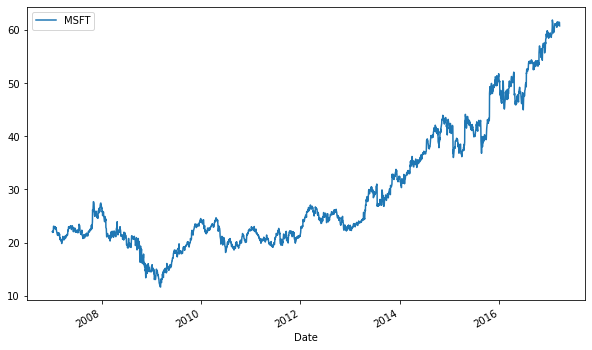

In [5]:
data.plot(figsize=(10, 6));

In [6]:
r = 0.025

In [7]:
stdev = log_returns.std() * 250 ** 0.5
stdev

MSFT    0.27886
dtype: float64

In [8]:
type(stdev)

pandas.core.series.Series

In [9]:
stdev = stdev.values
stdev

array([0.27885986])

In [10]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals  
iterations = 10000  

In [11]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S0 = data.iloc[-1]  
S[0] = S0 

for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [12]:
S

array([[60.72502899, 60.72502899, 60.72502899, ..., 60.72502899,
        60.72502899, 60.72502899],
       [60.38900189, 60.54990854, 59.74438531, ..., 60.79087887,
        61.47630491, 62.12712452],
       [60.31326245, 61.12343665, 59.97429496, ..., 60.69476767,
        62.2283304 , 63.55733329],
       ...,
       [70.80113887, 86.38266633, 71.33156128, ..., 56.98390966,
        86.41290951, 60.34408708],
       [72.76139318, 87.54949632, 72.7633803 , ..., 58.64555038,
        88.06716642, 59.09256536],
       [72.53018132, 91.10820899, 72.99573862, ..., 59.75984388,
        91.45306178, 58.01991464]])

In [13]:
S.shape

(251, 10000)

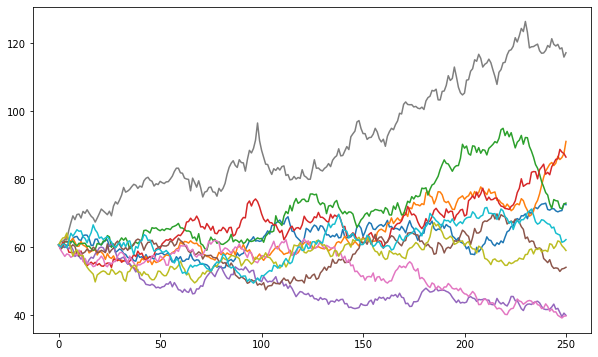

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [15]:
p = np.maximum(S[-1] - 110, 0)

In [16]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [17]:
p.shape

(10000,)

In [18]:
C = np.exp(-r * T) * np.sum(p) / iterations
C  

0.17296091149011666